In [1]:
import pandas as pd
import ast
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [2]:
job_shop_df = pd.read_csv('job_shop_data.csv', sep=';', index_col=False)
job_shop_df['problem_instance'] = job_shop_df['problem_instance'].apply(lambda x: ast.literal_eval(x))

In [3]:
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0..."
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ..."
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ..."
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ..."
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5..."


In [19]:
print(job_shop_df[job_shop_df.index == 200])

    instance_id  num_jobs  num_machines  \
200      50j16m        50            16   

                                      problem_instance  
200  [[(13, 6), (6, 3), (0, 6), (12, 8), (8, 2), (7...  


In [4]:
def random_solution_permutation_representation(problem_instance):
    num_jobs = len(problem_instance)
    num_machines = len(problem_instance[0])
    solution = [job for job in range(num_jobs) for i in range(num_machines)]
    random.shuffle(solution)
    return solution


def permutation_to_makespan(permutation_rep, problem_instance):
    makespan = 0
    current_time = 0
    num_jobs = len(problem_instance)
    num_machines = len(problem_instance[0])
    
    # keeps track of the number of times that a job has already occured
    job_count = [0 for job in range(num_jobs)]
    
    # keep track of the current end time of each job
    jobs_end_time = [0 for job in range(num_jobs)]
    
    # keep track of the current end time of each machine
    machines_end_time = [0 for machine in range(num_machines)]
    
    for job in permutation_rep:

        job_list = problem_instance[job] #gives the list of a job in which we find the sequence of machines and the processing times on those machines
        job_index = job_count[job] #to find the index at which the relevant machine number and processing time info is stored
#         print("We're looking up information at job index {job_index}".format(job_index=job_index))
        machine = job_list[job_index][0] #the machine that this job should be processed on now
        processing_time = job_list[job_index][1] #the relevant processing time
        
#         print("Job {job} will be processed on machine {machine} with processing time {processing_time}".format(job=job, machine=machine, processing_time=processing_time))
        
        # increase job occurrence for next iterations
        job_count[job] += 1
#         print("job id: {job}, job count: {count}".format(job=job, count=job_count[job]))
        
        # the job can start on this machine when both this job and this machine have finished their last run
        job_machine_end_time = max(jobs_end_time[job], machines_end_time[machine])
        new_end_time = job_machine_end_time + processing_time #add current processing time to the previous end time
        
        # assign new end time to both the relevant job and the relevant machine
        jobs_end_time[job] = new_end_time
        machines_end_time[machine] = new_end_time
        
    # when all jobs in the permutation representation have been assigned to the machines with their relevant processing times, the total makespan of the problem instance should be the max end time of either / both the job end times and the machine end times
    makespan = max(jobs_end_time)
#     print(max(jobs_end_time))
#     print(max(machines_end_time))
    return makespan

In [5]:
problem_instance = job_shop_df['problem_instance'][0]

In [6]:
num_random_solutions = 1000000
random_makespans = []

for solution in tqdm(range(num_random_solutions), desc='Processing'):
    random_permutation = random_solution_permutation_representation(problem_instance)
    makespan = permutation_to_makespan(random_permutation, problem_instance)
    random_makespans.append(makespan)

Processing: 100%|██████████████████| 1000000/1000000 [00:27<00:00, 36068.20it/s]


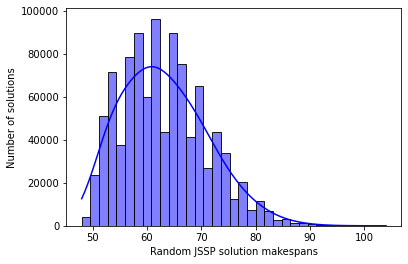

In [9]:
sns.histplot(random_makespans, kde=True, bins=35, kde_kws={'bw_method': 0.4}, color='blue')

# mu, std = norm.fit(random_makespans)
# x = np.linspace(min(random_makespans), max(random_makespans), 100)
# pdf = norm.pdf(x, mu, std)
# plt.plot(x, pdf, 'r-')

plt.xlabel('Random JSSP solution makespans')
plt.ylabel('Number of solutions')
# plt.title('')
# plt.grid(True)

# Show the histogram
# plt.show()
# plt.savefig('random_solutions.png')

In [10]:
problem_instance_large = job_shop_df['problem_instance'][200]

In [11]:
num_random_solutions = 1000000
random_makespans_large = []

for solution in tqdm(range(num_random_solutions), desc='Processing'):
    random_permutation = random_solution_permutation_representation(problem_instance_large)
    makespan = permutation_to_makespan(random_permutation, problem_instance_large)
    random_makespans_large.append(makespan)

Processing: 100%|███████████████████| 1000000/1000000 [12:54<00:00, 1291.19it/s]


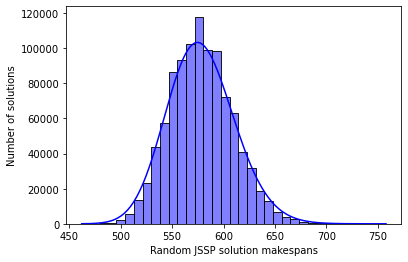

In [13]:
sns.histplot(random_makespans_large, kde=True, bins=35, kde_kws={'bw_method': 0.4}, color='blue')

# mu, std = norm.fit(random_makespans)
# x = np.linspace(min(random_makespans), max(random_makespans), 100)
# pdf = norm.pdf(x, mu, std)
# plt.plot(x, pdf, 'r-')

plt.xlabel('Random JSSP solution makespans')
plt.ylabel('Number of solutions')
# plt.title('')
# plt.grid(True)

# Show the histogram
# plt.show()
plt.savefig('random_solutions.png')